### Group Members:

#### 1. Aakash Aggarwal (3272727) aakash@uni-bonn.de
#### 2. Suhaila Mangat Paramban (3277917) s6sumang@uni-bonn.de

In [1]:
import numpy as np
from scipy.special import softmax
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Class for Logistic Classification

In [3]:
class Logistic_Network:
    def __init__(self,input_dim, output_dim,hidden_layer_dim, batch_size, learning_rate):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # initialisation of weights
        np.random.seed(2121995)
        self.W1 = np.random.normal(0,1,size=(hidden_layer_dim,input_dim))
        self.b1 = np.zeros((hidden_layer_dim,1))
        self.W2 = np.random.normal(0,1,size=(output_dim,hidden_layer_dim))
        self.b2 = np.zeros((output_dim,1))
    
    def fit(self,X, y, iterations):
        self.loss_save = np.empty(iterations)
        
        idx = np.arange(X.shape[1])
        for i in range(iterations):
            loss = 0
            batches = int(X.shape[1]/self.batch_size)
            for batch in range(batches):
                X_batch = X[:,self.batch_size*batch:self.batch_size*(batch+1)]
                y_batch = y[:,self.batch_size*batch:self.batch_size*(batch+1)]
                
                # forward propagation
                Z1 = self.W1@X_batch + self.b1
                A1 = sigmoid(Z1)
                
                Z2 = self.W2@A1 + self.b2
                A2 = softmax(Z2,axis=0)
                loss += np.mean(np.sum((A2 - y_batch)**2,axis=0))
                
                # backward propagation
                dE_dA2 = A2 - y_batch
                dA2_dZ2 = A2 * (1 - A2)
                
                dZ2_dA1 = self.W2.T
                dA1_dZ1 = A1 * (1 - A1)
                
                self.W2 = self.W2 - self.learning_rate*(dE_dA2*dA2_dZ2)@A1.T/self.batch_size
                self.b2 = self.b2 - self.learning_rate*np.sum((dE_dA2*dA2_dZ2)@A1.T)/self.batch_size

                self.W1 = self.W1 - self.learning_rate*((dZ2_dA1@(dE_dA2*dA2_dZ2))*dA1_dZ1)@X_batch.T/self.batch_size
                self.b1 = self.b1 - self.learning_rate*np.sum(((dZ2_dA1@(dE_dA2*dA2_dZ2))*dA1_dZ1)@X_batch.T)/self.batch_size
            
            self.loss_save[i] = loss/batches

            if (i+1)%10==0:
                np.set_printoptions(precision=2)
                print('Iteration: {0} - Loss:{1}'.format(i+1,loss/batches))
                
    def predict(self,X):
        Z1 = self.W1@X + self.b1
        A1 = sigmoid(Z1)
        Z2 = self.W2@A1 + self.b2
        return np.argmax(softmax(Z2,axis=0),axis=0)
    
    def accuracy(self,X,y):
        y_pred = self.predict(X)
        a = (y_pred == y.argmax(axis=0)).sum()
        return 100*a/y.shape[1]
    
    def display_loss(self):
        ax = sns.lineplot(data = self.loss_save)
        ax.set(xlabel = "Iterations", ylabel="Loss")
        plt.show()
        


## Data set loading and preprocessing

In [4]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

train_dataset= dsets.MNIST(root='./data',train=True,transform=np.asarray,download=True)
test_dataset= dsets.MNIST(root='./data',train=False,transform=np.asarray,download=True)

In [5]:
def one_hot_encoder(array):
    shape = (array.max()+1,array.shape[0])
    op_array = np.zeros(shape)
    op_array[array,np.arange(shape[1])]=1
    return op_array

In [6]:
X_train = np.array(list(map(lambda x: x[0].flatten()/255.0,train_dataset))).T
y_train = one_hot_encoder(np.array(list(map(lambda x: x[1],train_dataset))))

X_test = np.array(list(map(lambda x: x[0].flatten()/255.0,test_dataset))).T
y_test = one_hot_encoder(np.array(list(map(lambda x: x[1],test_dataset))))

In [7]:
print('Shape of data arrays: \nTrain X:{0},\tTrain y:{1},\nTest x:{2},\tTest y :{3}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

Shape of data arrays: 
Train X:(784, 60000),	Train y:(10, 60000),
Test x:(784, 10000),	Test y :(10, 10000)


## Training of 2-layer Network

In [8]:
nn = Logistic_Network(X_train.shape[0],y_train.shape[0],40,20,0.3)

In [9]:
nn.fit(X_train,y_train,300)

Iteration: 10 - Loss:0.25600112752362636
Iteration: 20 - Loss:0.18978979715978955
Iteration: 30 - Loss:0.16290152332154123
Iteration: 40 - Loss:0.1470212487412798
Iteration: 50 - Loss:0.13609364417656594
Iteration: 60 - Loss:0.12788785654869833
Iteration: 70 - Loss:0.12100627041263455
Iteration: 80 - Loss:0.11541848834604312
Iteration: 90 - Loss:0.11091223448164725
Iteration: 100 - Loss:0.10696757671852508
Iteration: 110 - Loss:0.10356691967306027
Iteration: 120 - Loss:0.10041020534259758
Iteration: 130 - Loss:0.09741635827362588
Iteration: 140 - Loss:0.09456261281077327
Iteration: 150 - Loss:0.09190216360720238
Iteration: 160 - Loss:0.08949899930795172
Iteration: 170 - Loss:0.08717739636582915
Iteration: 180 - Loss:0.08512771375848965
Iteration: 190 - Loss:0.08334092433498988
Iteration: 200 - Loss:0.08156379321594603
Iteration: 210 - Loss:0.07994260276964917
Iteration: 220 - Loss:0.07830623237461971
Iteration: 230 - Loss:0.07659251924193565
Iteration: 240 - Loss:0.07509321812134484
It

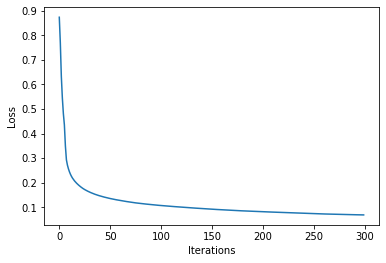

In [10]:
nn.display_loss()

## Accuracy

### Train Accuracy

In [11]:
nn.accuracy(X_train,y_train)

95.49666666666667

### Test Accuracy

In [12]:
nn.accuracy(X_test,y_test)

92.81